In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, os.path.dirname(os.getcwd()))

from src.question2 import (
    load_all_networks,
    get_smokers,
    analyze_closures_over_time,
    compare_smokers_nonsmokers,
    track_smoking_evolution,
    get_top_central_students,
    analyze_central_students_role
)

# Question 2: School Social Network Evolution

## Load Data

In [2]:
networks, properties = load_all_networks()

for day in [1, 30, 60, 90]:
    G = networks[day]
    smokers = get_smokers(G)
    print(f"Day {day}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges, {len(smokers)} smokers")

Day 1: 120 nodes, 25 edges, 20 smokers
Day 30: 120 nodes, 312 edges, 29 smokers
Day 60: 120 nodes, 1022 edges, 42 smokers
Day 90: 120 nodes, 1845 edges, 70 smokers


## Part 1: Closure Analysis

In [3]:
closure_results = analyze_closures_over_time(networks)

print("\n=" * 70)
print("CLOSURE ANALYSIS OVER TIME")
print("=" * 70)

for period, data in closure_results.items():
    print(f"\n{period}:")
    print(f"  Total new edges: {data['total_new_edges']}")
    print(f"  Triadic closures: {data['triadic_closures']} ({data['triadic_closures']/data['total_new_edges']*100:.1f}%)")
    print(f"  Triadic with smokers: {data['triadic_with_smokers']}")
    print(f"  Focal closures (smoking): {data['focal_closures_smoking']}")
    print(f"  Membership closures (same class): {data['membership_closures']} ({data['membership_closures']/data['total_new_edges']*100:.1f}%)")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
CLOSURE ANALYSIS OVER TIME

Day 1 → Day 30:
  Total new edges: 287
  Triadic closures: 12 (4.2%)
  Triadic with smokers: 5
  Focal closures (smoking): 169
  Membership closures (same class): 189 (65.9%)

Day 30 → Day 60:
  Total new edges: 710
  Triadic closures: 761 (107.2%)
  Triadic with smokers: 676
  Focal closures (smoking): 384
  Membership closures (same class): 322 (45.4%)

Day 60 → Day 90:
  Total new edges: 823
  Triadic closures: 801 (97.3%)
  Triadic with smokers: 738
  Focal closures (smoking): 459
  Membership closures (same class): 1043 (126.7%)


### Visualization: Closure Types Over Time

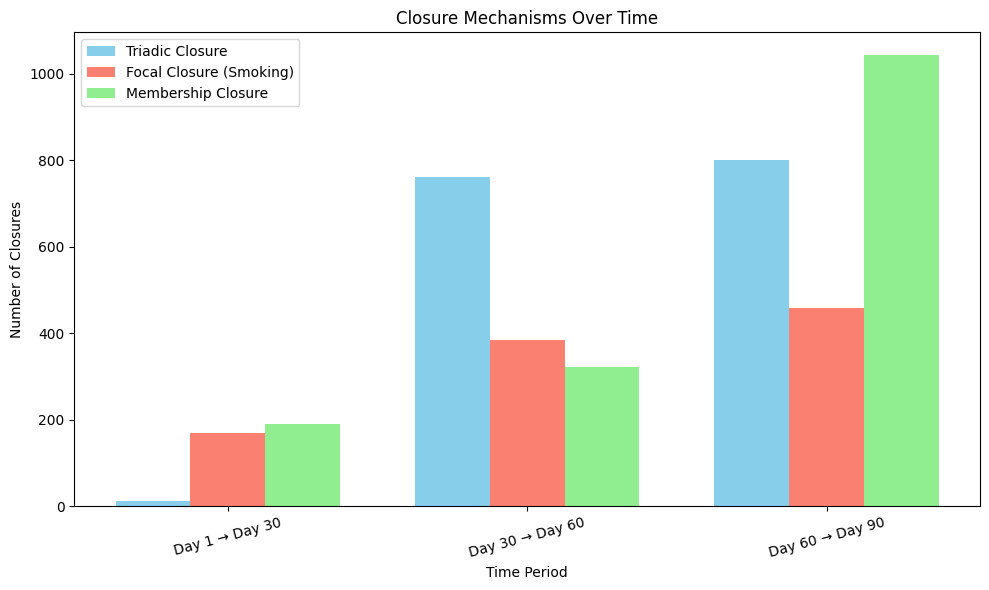

In [4]:
periods = list(closure_results.keys())
triadic = [closure_results[p]['triadic_closures'] for p in periods]
focal = [closure_results[p]['focal_closures_smoking'] for p in periods]
membership = [closure_results[p]['membership_closures'] for p in periods]

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(periods))
width = 0.25

ax.bar([i - width for i in x], triadic, width, label='Triadic Closure', color='skyblue')
ax.bar(x, focal, width, label='Focal Closure (Smoking)', color='salmon')
ax.bar([i + width for i in x], membership, width, label='Membership Closure', color='lightgreen')

ax.set_xlabel('Time Period')
ax.set_ylabel('Number of Closures')
ax.set_title('Closure Mechanisms Over Time')
ax.set_xticks(x)
ax.set_xticklabels(periods, rotation=15)
ax.legend()
plt.tight_layout()
plt.show()

## Part 2: Smoking Evolution

In [5]:
smoking_evolution = track_smoking_evolution(properties)

print("\n=" * 70)
print("SMOKING BEHAVIOR EVOLUTION")
print("=" * 70)
for day, count in smoking_evolution.items():
    print(f"{day}: {count} smokers")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
SMOKING BEHAVIOR EVOLUTION
Day 1: 20 smokers
Day 30: 29 smokers
Day 60: 42 smokers
Day 90: 70 smokers


### Smokers vs Non-Smokers Comparison

In [6]:
comparison = compare_smokers_nonsmokers(properties)

print("\n=" * 70)
print("SMOKERS vs NON-SMOKERS COMPARISON")
print("=" * 70)

for day, data in comparison.items():
    print(f"\n{day}:")
    print(f"  Smokers: {data['n_smokers']}, Non-smokers: {data['n_non_smokers']}")
    print(f"  Male smokers: {data['smokers_male']}/{data['n_smokers']} ({data['smokers_male']/data['n_smokers']*100:.1f}%)")
    print(f"  Male non-smokers: {data['nonsmokers_male']}/{data['n_non_smokers']} ({data['nonsmokers_male']/data['n_non_smokers']*100:.1f}%)")
    print(f"  Avg age - Smokers: {data['smokers_avg_age']:.2f}, Non-smokers: {data['nonsmokers_avg_age']:.2f}")
    print(f"  Avg studies - Smokers: {data['smokers_avg_studies']:.2f}, Non-smokers: {data['nonsmokers_avg_studies']:.2f}")
    print(f"  Football - Smokers: {data['smokers_football']}, Non-smokers: {data['nonsmokers_football']}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
SMOKERS vs NON-SMOKERS COMPARISON

Day 1:
  Smokers: 20, Non-smokers: 100
  Male smokers: 18/20 (90.0%)
  Male non-smokers: 69/100 (69.0%)
  Avg age - Smokers: 16.85, Non-smokers: 15.86
  Avg studies - Smokers: 2.60, Non-smokers: 2.57
  Football - Smokers: 11, Non-smokers: 25

Day 30:
  Smokers: 29, Non-smokers: 91
  Male smokers: 24/29 (82.8%)
  Male non-smokers: 63/91 (69.2%)
  Avg age - Smokers: 16.72, Non-smokers: 15.80
  Avg studies - Smokers: 2.62, Non-smokers: 2.53
  Football - Smokers: 16, Non-smokers: 29

Day 60:
  Smokers: 42, Non-smokers: 78
  Male smokers: 31/42 (73.8%)
  Male non-smokers: 56/78 (71.8%)
  Avg age - Smokers: 16.45, Non-smokers: 15.79
  Avg studies - Smokers: 1.52, Non-smokers: 2.56
  Football - Smokers: 25, Non-smokers: 38

Day 90:
  Smokers: 70, Non-smokers: 50
  Male smokers: 50/70 (71.4%)
  Male non-smokers: 37/50 (7

### Visualization: Feature Distributions

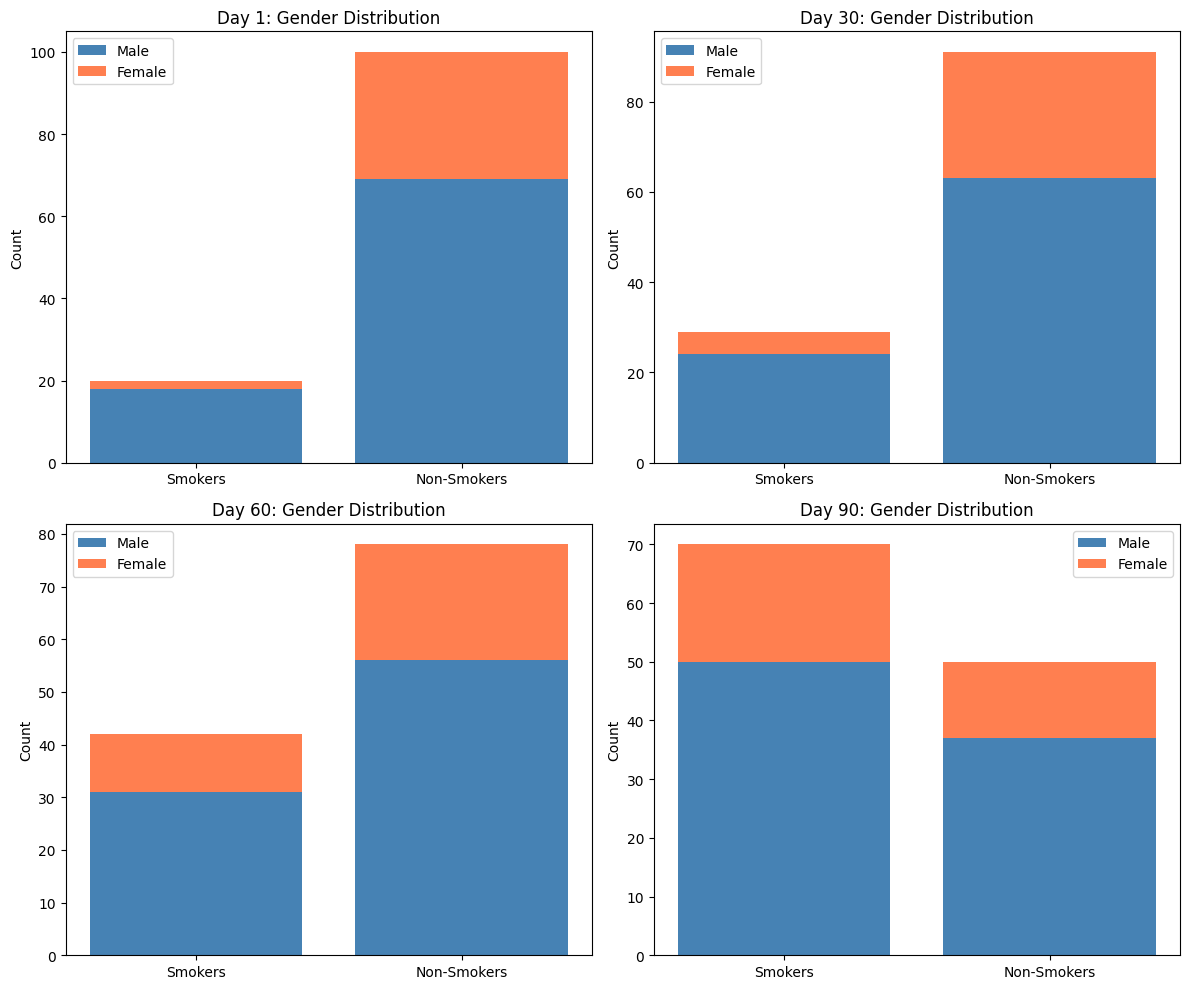

In [7]:
# Gender distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
days = [1, 30, 60, 90]

for idx, day in enumerate(days):
    ax = axes[idx // 2, idx % 2]
    data = comparison[f'Day {day}']
    
    categories = ['Smokers', 'Non-Smokers']
    male = [data['smokers_male'], data['nonsmokers_male']]
    female = [data['n_smokers'] - data['smokers_male'], data['n_non_smokers'] - data['nonsmokers_male']]
    
    x = range(len(categories))
    ax.bar(x, male, label='Male', color='steelblue')
    ax.bar(x, female, bottom=male, label='Female', color='coral')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Count')
    ax.set_title(f'Day {day}: Gender Distribution')
    ax.legend()

plt.tight_layout()
plt.show()

## Part 3: Degree Centrality Analysis

In [8]:
G_final = networks[90]
top_students = get_top_central_students(G_final, top_n=5)

print("\n=" * 70)
print("TOP 5 MOST CENTRAL STUDENTS (Day 90)")
print("=" * 70)

for i, student in enumerate(top_students, 1):
    print(f"\n{i}. Student {student['student_id']}:")
    print(f"   Degree Centrality: {student['centrality']:.4f}")
    print(f"   Degree: {student['degree']}")
    print(f"   Smoker: {'Yes' if student['smokes'] == 1 else 'No'}")
    print(f"   Gender: {'Boy' if student['gender'] == 1 else 'Girl'}")
    print(f"   Class: {student['class']}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
TOP 5 MOST CENTRAL STUDENTS (Day 90)

1. Student 37:
   Degree Centrality: 0.4706
   Degree: 56
   Smoker: Yes
   Gender: Boy
   Class: 2

2. Student 14:
   Degree Centrality: 0.4538
   Degree: 54
   Smoker: Yes
   Gender: Girl
   Class: 1

3. Student 116:
   Degree Centrality: 0.4538
   Degree: 54
   Smoker: Yes
   Gender: Girl
   Class: 4

4. Student 72:
   Degree Centrality: 0.4454
   Degree: 53
   Smoker: Yes
   Gender: Boy
   Class: 3

5. Student 53:
   Degree Centrality: 0.4370
   Degree: 52
   Smoker: Yes
   Gender: Boy
   Class: 2


### Role Analysis

In [9]:
role_analysis = analyze_central_students_role(G_final, top_students)

print("\n=" * 70)
print("ROLE OF CENTRAL STUDENTS IN NETWORK")
print("=" * 70)

for analysis in role_analysis:
    print(f"\nStudent {analysis['student_id']}:")
    print(f"  Total connections: {analysis['total_connections']}")
    print(f"  Smoker connections: {analysis['smoker_connections']} ({analysis['smoker_connections']/analysis['total_connections']*100:.1f}%)")
    print(f"  Is smoker: {'Yes' if analysis['is_smoker'] == 1 else 'No'}")
    print(f"  Influence potential: {analysis['influence_potential']:.2f}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
ROLE OF CENTRAL STUDENTS IN NETWORK

Student 37:
  Total connections: 56
  Smoker connections: 43 (76.8%)
  Is smoker: Yes
  Influence potential: 0.77

Student 14:
  Total connections: 54
  Smoker connections: 49 (90.7%)
  Is smoker: Yes
  Influence potential: 0.91

Student 116:
  Total connections: 54
  Smoker connections: 40 (74.1%)
  Is smoker: Yes
  Influence potential: 0.74

Student 72:
  Total connections: 53
  Smoker connections: 43 (81.1%)
  Is smoker: Yes
  Influence potential: 0.81

Student 53:
  Total connections: 52
  Smoker connections: 37 (71.2%)
  Is smoker: Yes
  Influence potential: 0.71


## Network Growth Visualization

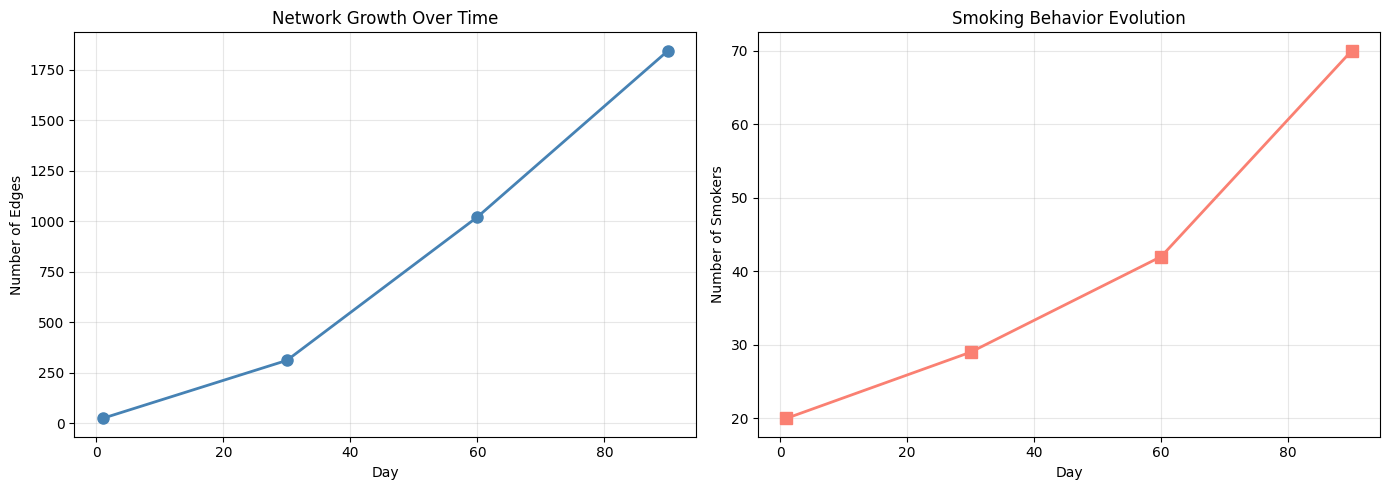

In [10]:
days = [1, 30, 60, 90]
nodes = [networks[d].number_of_nodes() for d in days]
edges = [networks[d].number_of_edges() for d in days]
smokers_count = [len(get_smokers(networks[d])) for d in days]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Network growth
ax1.plot(days, edges, marker='o', linewidth=2, markersize=8, label='Edges', color='steelblue')
ax1.set_xlabel('Day')
ax1.set_ylabel('Number of Edges')
ax1.set_title('Network Growth Over Time')
ax1.grid(True, alpha=0.3)

# Smokers evolution
ax2.plot(days, smokers_count, marker='s', linewidth=2, markersize=8, label='Smokers', color='salmon')
ax2.set_xlabel('Day')
ax2.set_ylabel('Number of Smokers')
ax2.set_title('Smoking Behavior Evolution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()